In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
# Define the ticker symbol for Ibovespa (Bovespa) index
ticker_symbol = 'PETR3.SA'

# Set the start and end dates for the historical data
start_date = '2023-01-01'
end_date = '2023-08-30'

# Fetch the data using yfinance
ibovespa_data = yf.download(ticker_symbol, start=start_date, end=end_date)

ibovespa_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,26.850000,27.299999,25.959999,26.170000,21.515533,14365400
2023-01-03,26.360001,26.549999,25.480000,25.799999,21.211338,28657500
2023-01-04,25.740000,26.900000,25.299999,26.230000,21.564861,24517300
2023-01-05,26.570000,27.340000,26.450001,27.080000,22.263683,20367800
2023-01-06,27.150000,27.730000,26.820000,26.910000,22.123919,14109900


In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
value_counts_desc = df.stack().value_counts().sort_values(ascending=False)
value_counts_desc.head(10)

no             121708
999             39675
0               35582
nonexistent     35563
yes             32467
cellular        26144
married         24928
1               22250
1.4             16247
5228.1          16234
dtype: int64

In [6]:
condition = (df['pdays'] == 999) & (df['poutcome'] == 'failure')

df.loc[condition, 'poutcome'] = 'nonexistent'

In [7]:
df['poutcome'].value_counts()

nonexistent    39673
success         1373
failure          142
Name: poutcome, dtype: int64

In [8]:
df.replace('unknown', np.nan, inplace=True)
df.replace('nonexistent', np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


### Modelo de random forest para feature_importance

Accuracy on the test set: 0.91


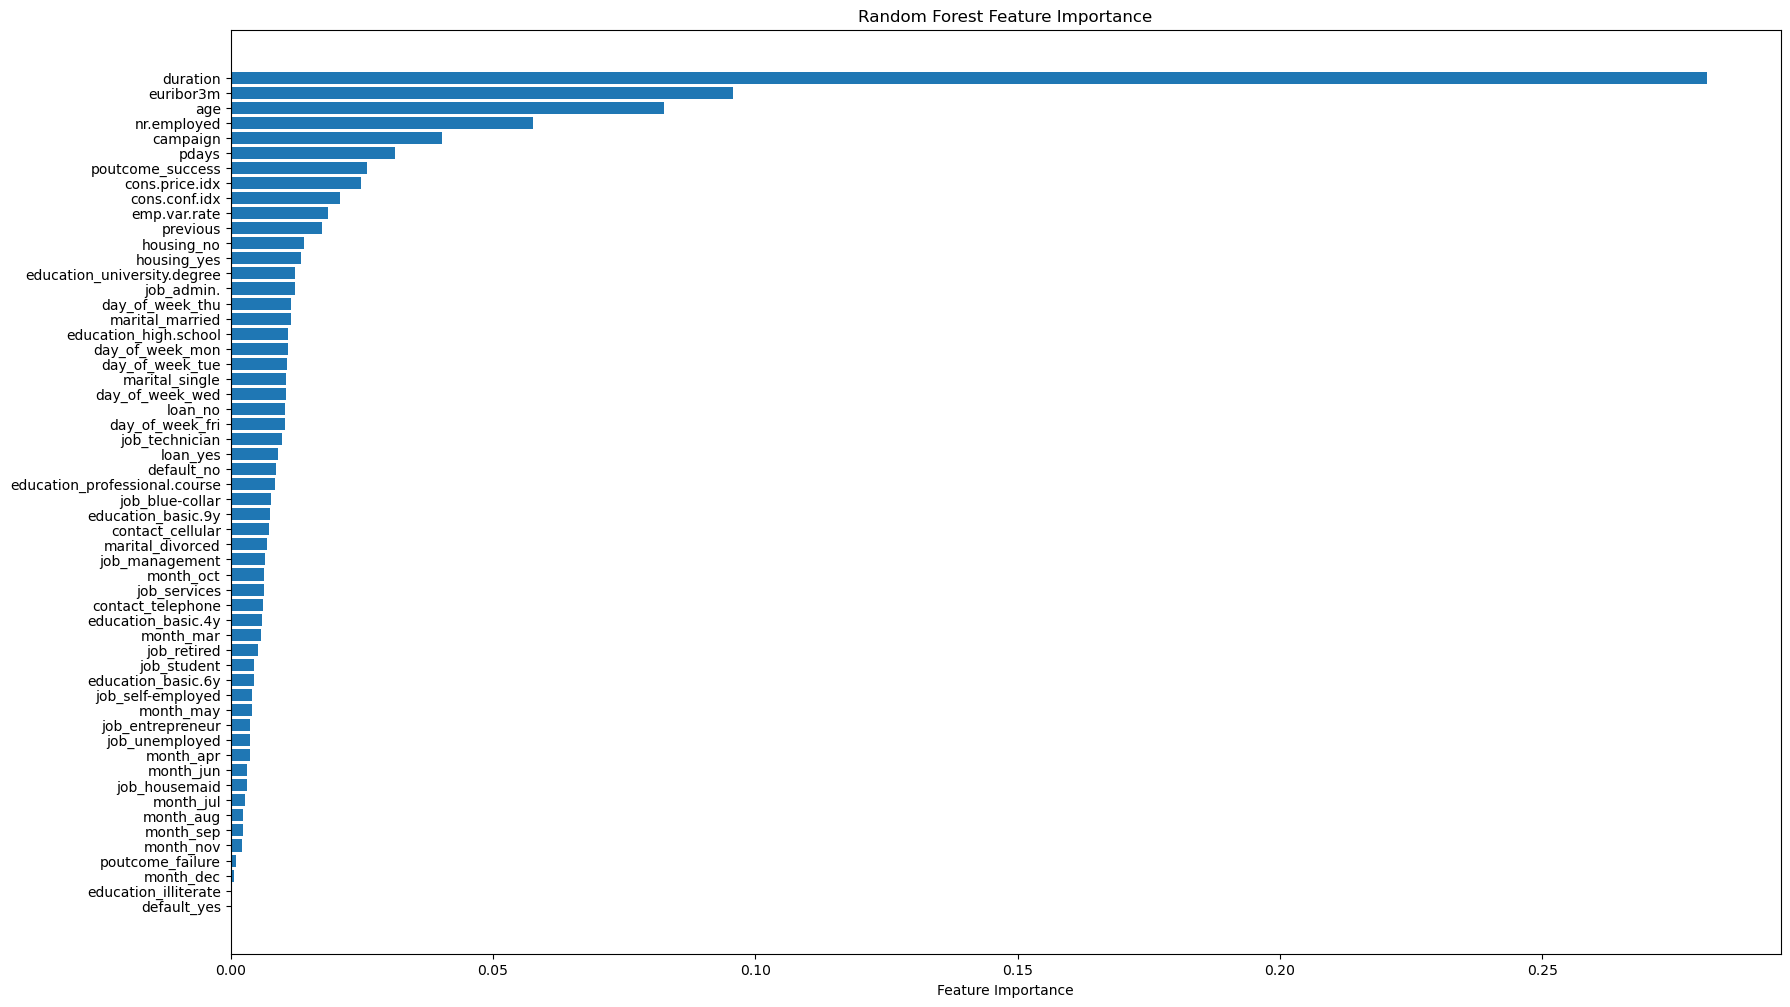

In [9]:
X = df.drop(columns=['y'])
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
probabilities = rf_model.predict_proba(X_test)

prob_yes = probabilities[:, 1]
prob_no = probabilities[:, 0]

print("Probabilities for 'yes':", prob_yes[:5])
print("Probabilities for 'no':", prob_no[:5])

Probabilities for 'yes': [0.05 0.   0.   0.01 0.01]
Probabilities for 'no': [0.95 1.   1.   0.99 0.99]


### Removendo 'duration', pois a variável torna o dataset biased

Accuracy on the test set: 0.89


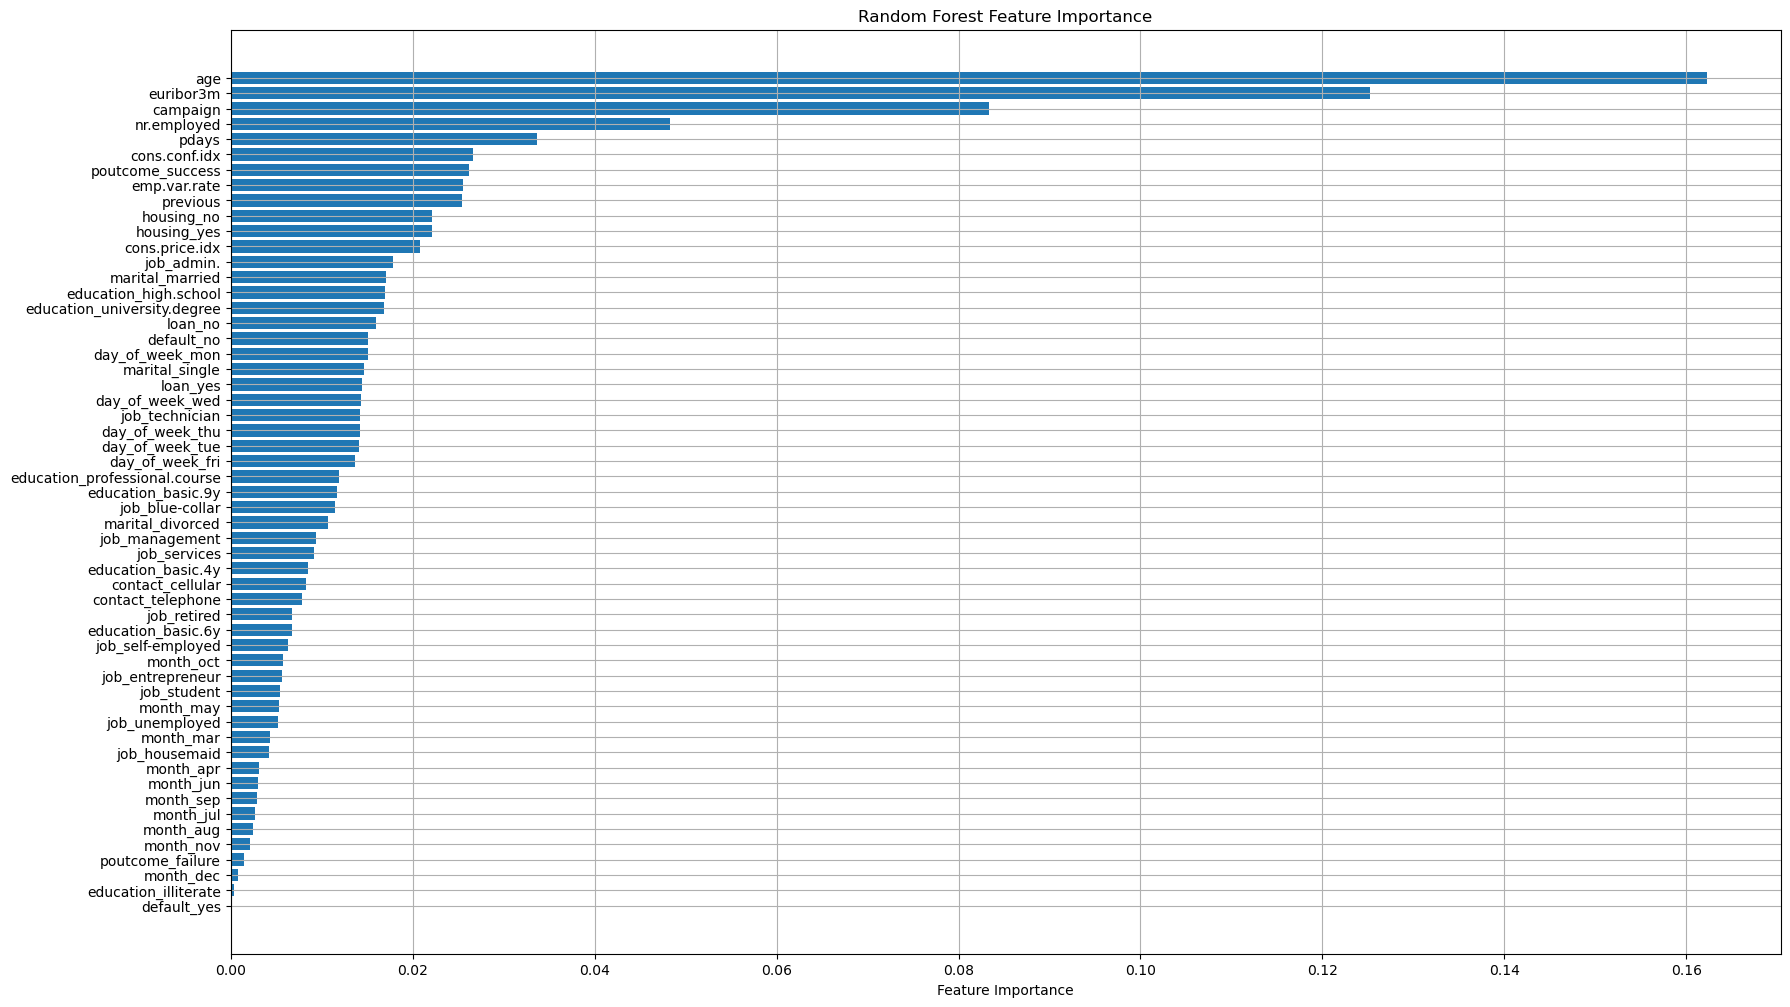

In [12]:
X = df.drop(columns=['y', 'duration'])
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid()
plt.show()

### Somente as features com importance > 0.4

Accuracy on the test set: 0.88


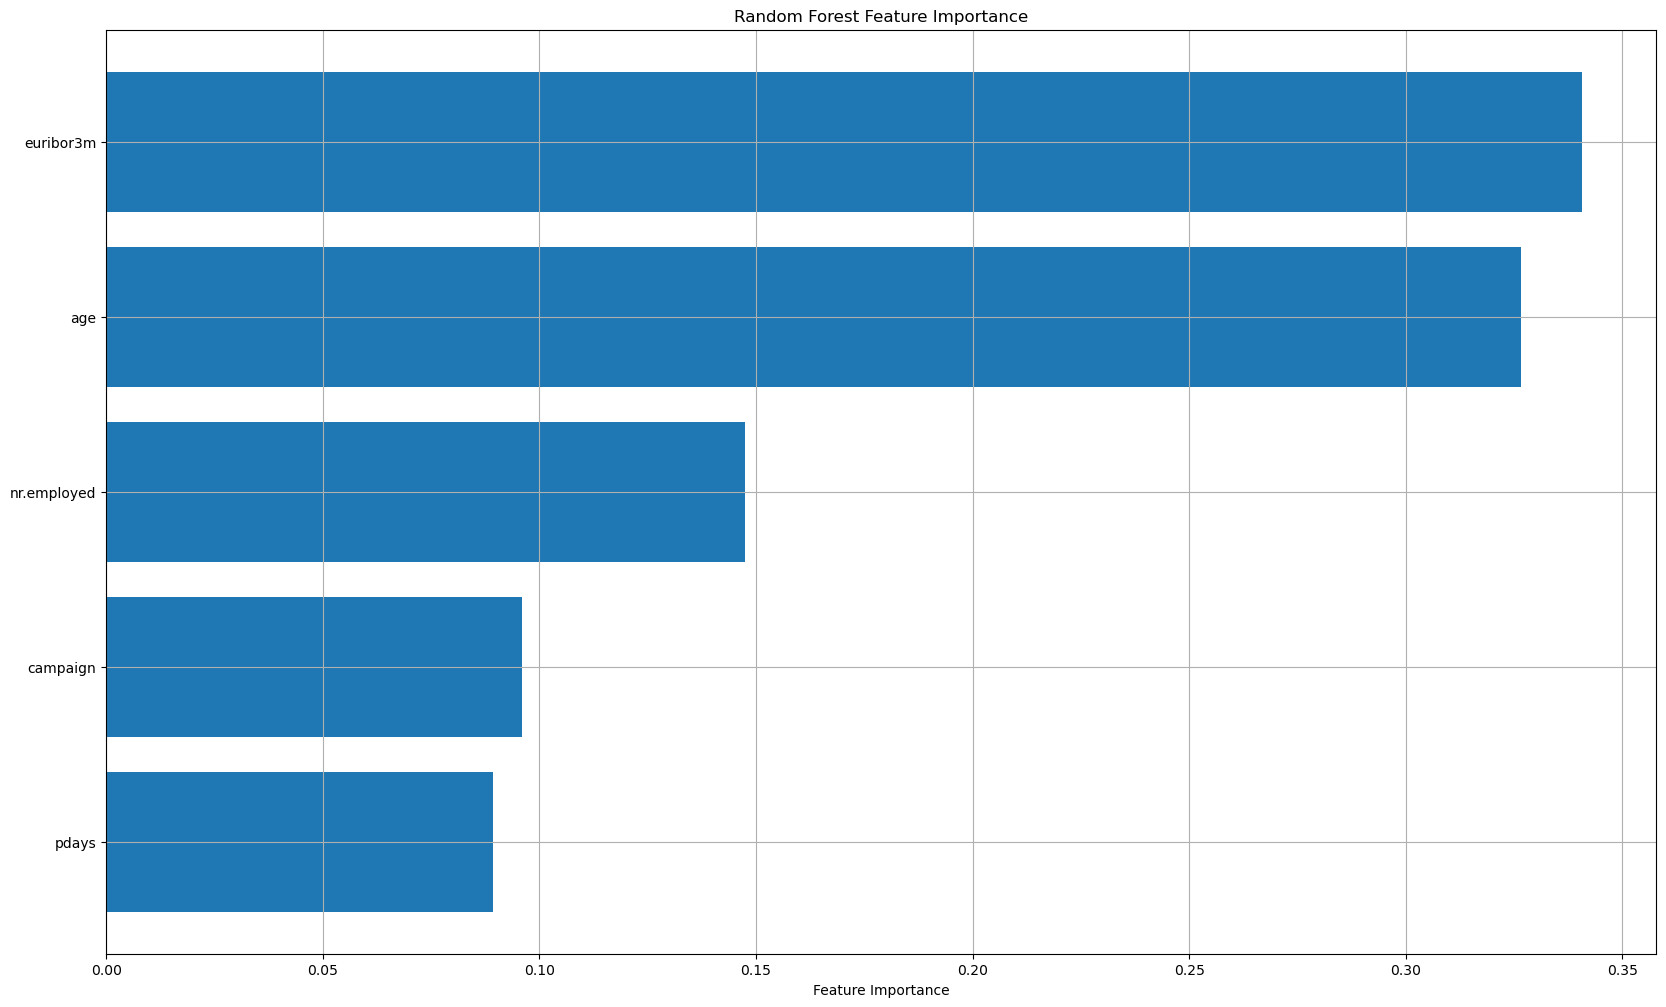

In [13]:
X = df[['age', 'euribor3m', 'campaign', 'nr.employed', 'pdays']]
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid()
plt.show()

In [14]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


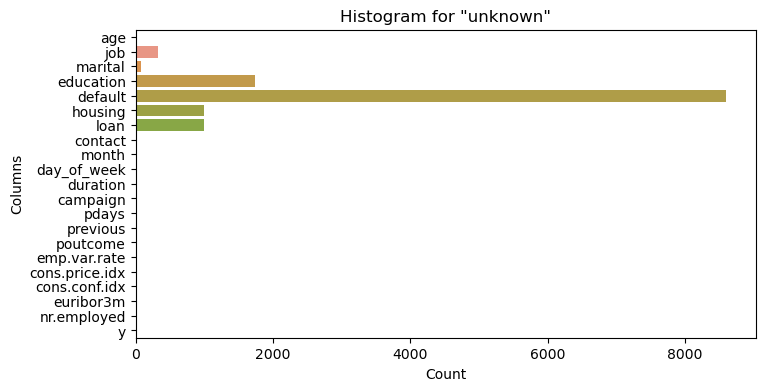

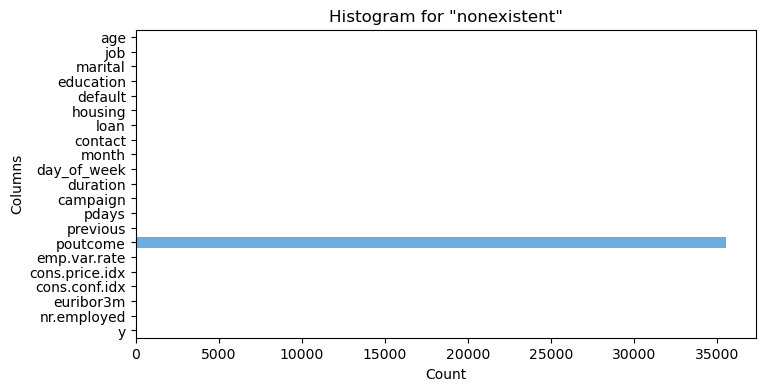

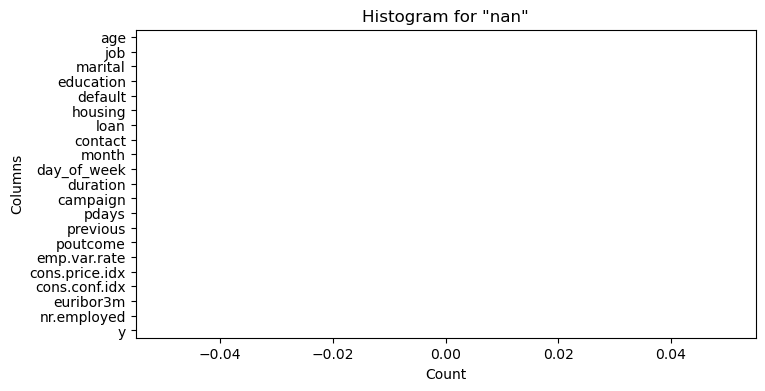

In [24]:
search_values = ['unknown', 'nonexistent', np.nan]

# Create subplots for each search value
for value in search_values:
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram for "{value}"')
    
    # Initialize a count for each column
    counts = []
    
    # Iterate through columns
    for column in df.columns:
        # Count occurrences of the value in the column
        count = df[column].apply(lambda x: x == value).sum()
        counts.append(count)
    
    # Create a bar plot for the counts
    sns.barplot(x=counts, y=df.columns)
    plt.xlabel('Count')
    plt.ylabel('Columns')